#Lab 2
Varun Nayyar

## Inverse transfom

Firstly note that for 
$u = \frac{x^2 + x}{2}$ 
we have an inverse given by 
$x = (-1 + \sqrt{1+8u})/2$

since we only consider 0<x<1 

Now for the inverse transform, we simply pass a uniform random variable into this function and we obtain a sample of x

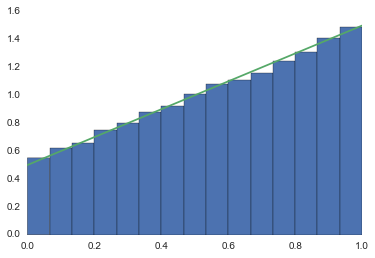

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #nice plots
%matplotlib inline 

def invF(u): #full function defintion
    return (-1 + np.sqrt(1+8*u))/2.0

numSamples = 60000
u = np.random.uniform(size=numSamples)
x = invF(u) # draw samples for us

plt.hist(x, normed=True, bins = 15)

xpoints = np.linspace(0,1)
f = lambda x: x+0.5 #using an inline function definition, same as f(x) = x+0.5

plt.plot(xpoints, f(xpoints))

Note for this distribution, the cdf is obviously
\begin{align}
    F(x) = & \frac{e^{2x}}{2}, x<0  \\
    & 1-\frac{e^{-2x}}{2}, x\geq0
\end{align}

So basically, the inverse transform is 



\begin{align}
    F^{-1}(u) = &\frac{1}{2} \ln(2u),0 < u<1/2 \\
    & \frac{-1}{2} \ln(2-2u), 1/2 \leq u <1
\end{align}   

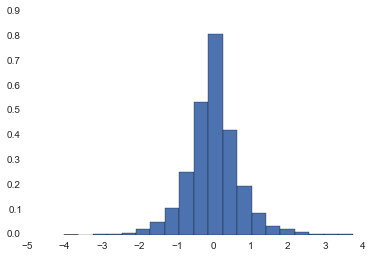

In [14]:
def invFexp(u):
    ans = np.zeros(len(u))
    ans[u<0.5] = 0.5 * np.log(2*u[u<0.5])
    ans[u>=0.5] = -0.5 * np.log(2-2*u[u>=0.5])
    return ans

numSamples = 10000
u = np.random.uniform(size=numSamples)

x = invFexp(u)

plt.hist(x, bins = 20, normed = True)

xp = np.linspace(min(x)-0.5, max(x)+0.5, 1000)

In [16]:
exppdf = lambda x: np.exp(2*x) if x<0 else np.exp(-2*x)
exppdf(xp)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()